Copyright 2022 Dale Bowman, Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Regression trees

In a previous notebook, you learned about decision trees which are used to predict a class label.
In this notebook, we will see how the decision trees can be used to make numeric predictions.
This method is known as *regression trees*.

Both methods partition a data set based on criteria of different variables (features) which can be categorical and/or numeric, and both methods have a tree structure.
We'll first begin with a a complete example of regression trees without code and then break the example down with code.

## What you will learn

In this notebook you will learn how to use decision trees with numerical and categorical variables to make predictions.  We will study the following:

- Basics of regression trees
- How to construct regression trees
- Pruning

## When to use regression trees

Regression trees are useful when you want to make a fast prediction using a decision tree.  They are used when the relationship between variables and the response might not be linear and when you want to know which variables have the largest impact on the response.

## Basics of Regression Trees

Unlike multiple regression, which assumes the relationship between response and features is linear, regression trees make no assumptions about the relationship between response and features.
In other words, regression trees are non-parametric models. 
This makes regression trees particularly useful when the relationship between response and features is non-linear and difficult to specify.

The figure below is an example of a regression tree.
In this model, baseball players salaries are predicted based on how long they have been playing and the number of hits the player had in the previous season.
Because the salaries of some baseball players can be much larger than the majority of the players (i.e.
the salaries have outliers), we use a transformation and look at the log of the salaries.

<!--  ![](HittersPrune){width="12cm"} -->
<!-- 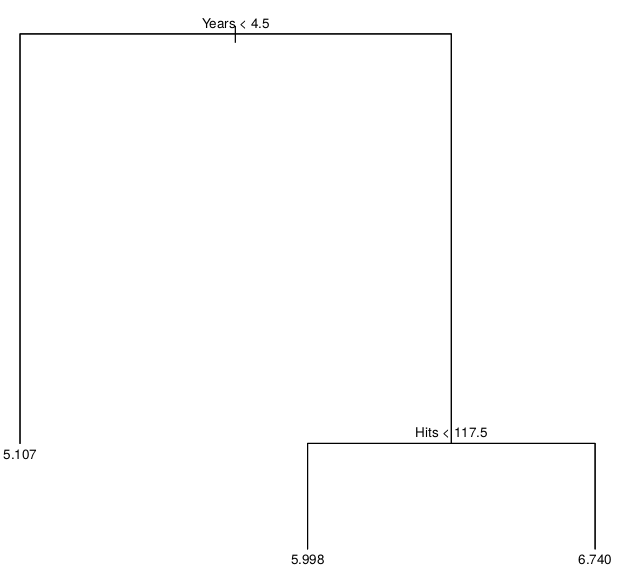 -->
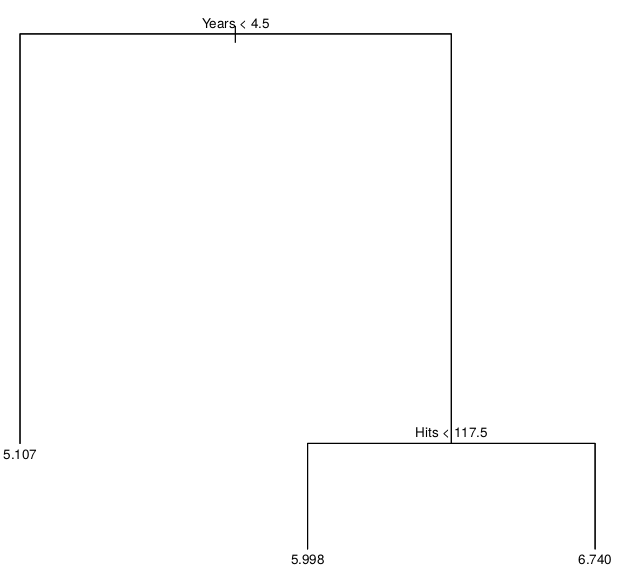
<center><b>Figure 1</b></center>

In this tree, the first partition is based on whether the player has been playing less than 4.5 years (left branch) or greater than or equal to 4.5 years (right branch).
For players who have been playing less than 4.5 years, the number of hits is not useful in predicting their salary. Their salary is predicted by averaging all the salaries of players with years &lt; 4.5.
This number is shown at the leaf of this branch and is 5.107.
Remember this is the log of the salary (in thousands of dollars) and so the predicted salary is $1000*e^{5.107} = \$ 165,174$.

 For the players that have been playing for longer than 4.5 years, the variable *Hits* further distinguishes the predicted salary.
For those with hits below 117.5, the predicted log salary, 5.998, is found as the average log salary of all players who have both $ Years \ge 4.5$ and $Hits < 117.5$.

<!--  ![](regPlot){width="12cm"} -->
<!-- 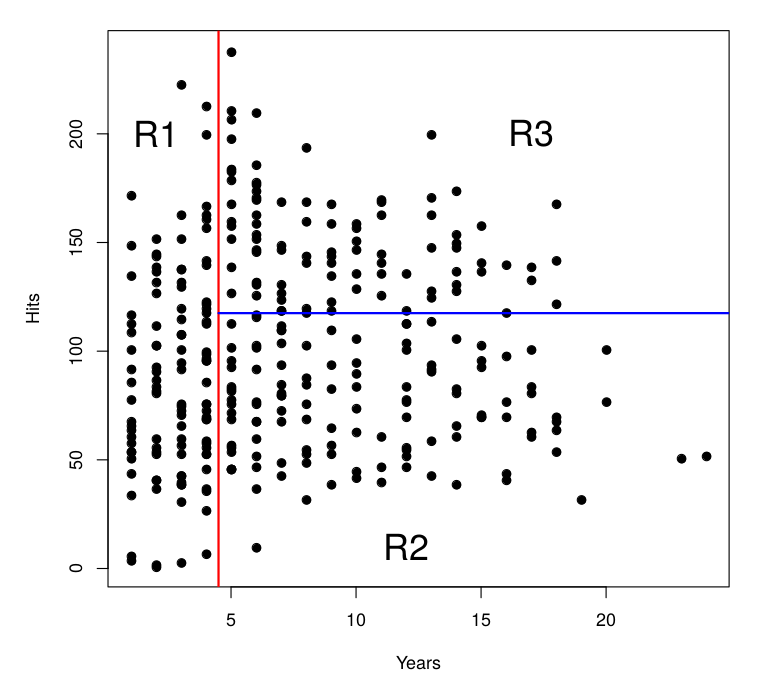 -->
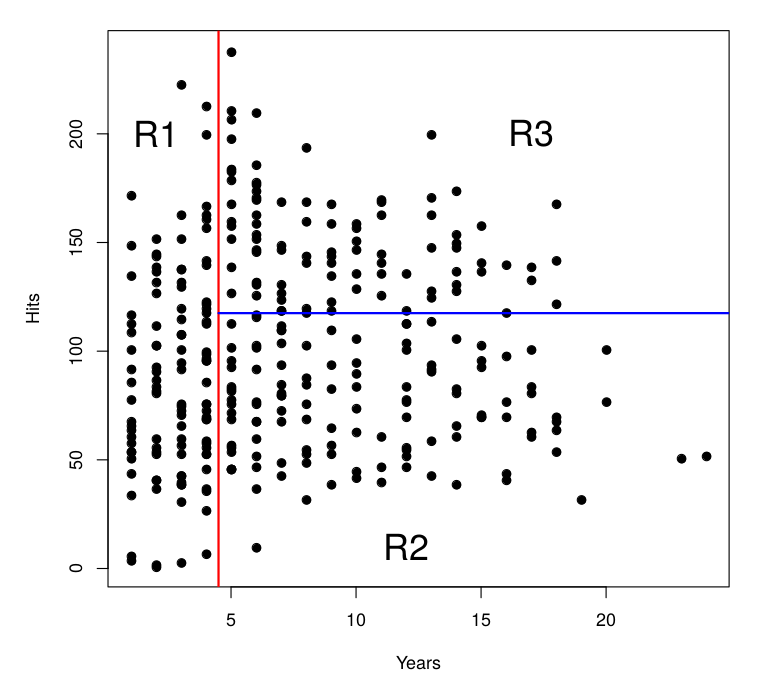
<center><b>Figure 2</b></center>

The regression tree can be visualized as in the plot in Figure 2.
This kind of plot is sometimes called a *decision surface* and is way of visualizing a tree on top of a scatterplot of the data.
The region *R1* corresponds to all players who have been playing less than 4.5 years.
The average of the log salaries in region R1 is the predicted value shown in the leftmost leaf of the tree in Figure 1, 5.107.
The three regions can be summarized as:

 -   R1: X | Years &lt;4.5

 -   R2: X | Years $\ge$ 4.5, Hits &lt; 117.5

 -   R3: X | Years $\ge$ 4.5, Hits $\ge$ 117.5
 
Thus each region corresponds to a leaf in Figure 1.

## How are regression trees made?

 The algorithm that creates the tree partitions the set of features into $J$ distinct and non-overlapping regions, $R_1, R_2, \ldots, R_J$.
The predicted response in region $R_i$ is then the **mean** (arithmetic average) of the responses in that region.
The regions are defined to be rectangles (or higher-dimension boxes) for simplicity.
The regions are chosen to minimize the **sum of the squared differences** between each observed response and the predicted response (like linear regression).
It is not computationally possible to look at all possible partitions, so the regression tree is constructed using *recursive binary splitting*, which means that at each split, the tree branches into two parts choosing the best split (in terms of the sum of squared differences).

## Pruning

 The tree shown in Figure 1 is actually derived from another tree by *pruning*.
It is a tree that has been pruned to have only three nodes.
A bigger tree is shown in the figure below.
This tree has eight nodes rather than three and the prediction of salary is seen to be a bit more complex than the previous tree.

<!--  ![](treefit){width="12cm"} -->
<!-- 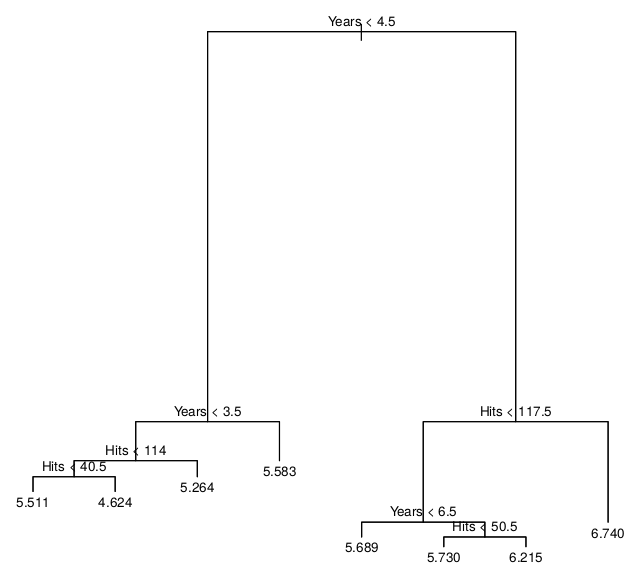 -->
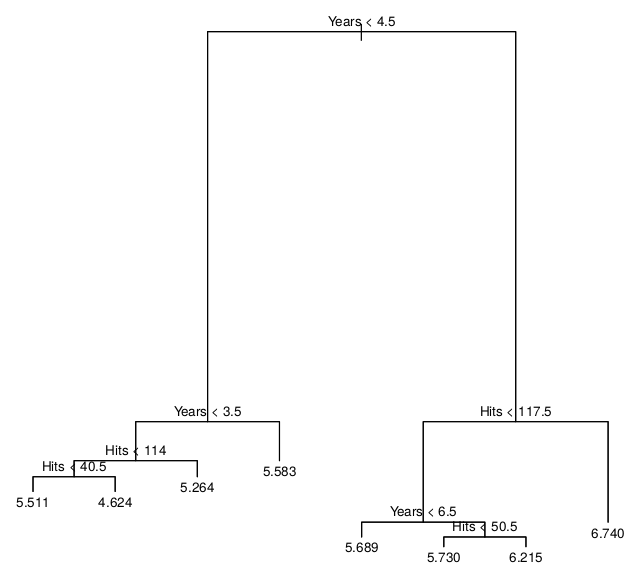
<center><b>Figure 3</b></center>

It is often a good idea to start with a big tree and use some systematic methods to prune the tree to an acceptable or optimal level.
Pruning is the same idea as regularization, which we talked about with lasso and ridge regression.
There are algorithms similar to the Lasso that can be used to find a good pruning (called a *subtree*) for our regression tree that *penalizes* the sum of squared errors for having more nodes.
For example, if you have the number of nodes equal to the number of data points with one point per node, your sum of squared errors would be zero since the predicted value would equal the observed value for all nodes.
But this would not be very good for prediction of a new data point.
Ideally we would like to have enough nodes (leaves) so that the responses within each leaf are closely spaced and the regression surface is nearly constant.

## Summary

 Some of the advantages of regression trees are summarized here.

 -   Making predictions is fast - you just look up the constants in the tree.

 -   It is easy to see what variables are most important in making the predictions.

 -   If some data is missing and we can't get all the way to a leaf, we can still make a prediction by averaging all the leaves in the subtree we can reach.

 -   The model works well for non-linear relationships and for linear relationships.

 -   The trees can be built quickly using computer algorithms. 

## Example: Baseball

The theory section above uses the following Major League Baseball data from 1986 and 1987.

We would like to predict `Salary` as described above, using just `Hits` and `Years`.

| Variable  | Type    | Description                                                                      |
|:-----------|:---------|:----------------------------------------------------------------------------------|
| AtBat     | Ratio   | Number of times at bat in 1986                                                   |
| Hits      | Ratio   | Number of hits in 1986                                                           |
| HmRun     | Ratio   | Number of home runs in 1986                                                      |
| Runs      | Ratio   | Number of runs in 1986                                                           |
| RBI       | Ratio   | Number of runs batted in in 1986                                                 |
| Walks     | Ratio   | Number of walks in 1986                                                          |
| Years     | Ratio   | Number of years in the major leagues                                             |
| CAtBat    | Ratio   | Number of times at bat during his career                                         |
| CHits     | Ratio   | Number of hits during his career                                                 |
| CHmRun    | Ratio   | Number of home runs during his career                                            |
| CRuns     | Ratio   | Number of runs during his career                                                 |
| CRBI      | Ratio   | Number of runs batted in during his career                                       |
| CWalks    | Ratio   | Number of walks during his career                                                |
| League    | Nominal | A factor with levels A and N indicating player's league at the end of 1986       |
| Division  | Nominal | A factor with levels E and W indicating player's division at the end of 1986     |
| PutOuts   | Ratio   | Number of put outs in 1986                                                       |
| Assists   | Ratio   | Number of assists in 1986                                                        |
| Errors    | Ratio   | Number of errors in 1986                                                         |
| Salary    | Ratio   | 1987 annual salary on opening day in thousands of dollars                        |
| NewLeague | Nominal | A factor with levels A and N indicating player's league at the beginning of 1987 |

<div style="text-align:center;font-size: smaller">
    <b>Source:</b> This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
</div>

### Load data

Start by loading `readr`, `dplyr`, and `tidyr` so we can read data into a dataframe and manipulate it:

- `library readr`
- `library dplyr`
- `library tidyr`

In [4]:
library(readr)
library(dplyr)
library(tidyr)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable><variable id="%ovw[;dNkqx,|V0M/RZA">tidyr</variable></variables><block type="import_R" id="q]np1Ju|B`4k*R-zylwU" x="44" y="66"><field name="libraryName" id="_;PP-/]_2fNUR.dyhw(8">readr</field><next><block type="import_R" id="(%@0XC,((6M%4]kj+iDm"><field name="libraryName" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><next><block type="import_R" id="l.:Sc#tFH?#!tX=Zl.4b"><field name="libraryName" id="%ovw[;dNkqx,|V0M/RZA">tidyr</field></block></next></block></next></block></xml>

Read the data into a dataframe:
    
- Set `dataframe` to `with readr do read_csv`
    - using `"datasets/baseball.csv"`
- `dataframe` (to display)

In [2]:
dataframe = readr::read_csv("datasets/baseball.csv")

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable></variables><block type="variables_set" id="gM*jw`FfIR3)8=g0iEB7" x="28" y="220"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="varDoMethod_R" id=",vaW{t?FHN1~E?+,h!w-"><mutation items="1"></mutation><field name="VAR" id="_;PP-/]_2fNUR.dyhw(8">readr</field><field name="MEMBER">read_csv</field><data>readr:read_csv</data><value name="ADD0"><block type="text" id="dfrpI5b@DHr+DQ:|@vpv"><field name="TEXT">datasets/baseball.csv</field></block></value></block></value></block><block type="variables_get" id="dn{+Q#DO%lN;G_tFGJ#B" x="8" y="304"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></xml>

Rows: 322 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): League, Division, NewLeague
dbl (17): AtBat, Hits, HmRun, Runs, RBI, Walks, Years, CAtBat, CHits, CHmRun...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NA,A
315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
593,172,22,82,100,57,1,593,172,22,82,100,57,A,W,1222,139,15,165,A


Take a look at the first row, all the way across.
See the problem?

There are `NaN`s in this data. 
`NaN` stands for "not a number" and is one of the common codes for missing data (the other is "NA" or "na").
The problem for us is that we can't fit a model to missing data.
We previously solved this problem with the diabetes data my replacing 0 with the median, but this time we are simply going to drop all rows/datapoints that have NaN in them:

- Set `dataframe` to 
    - `pipe`
        - `dataframe`
        - to with `tidyr` do `drop_na`
        
        
*Note: In general, you cannot eyeball the data to find NA. Probably the best way is to use `base::summary`, which gives you the five number summary and also shows how many NA are in each column.*

In [5]:
dataframe = dataframe %>%
    tidyr::drop_na()

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="%ovw[;dNkqx,|V0M/RZA">tidyr</variable></variables><block type="variables_set" id="dSd/7cN]dxLi]5aOx*cL" x="-123" y="58"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="pipe_R" id="WqzxvhEZ*^+:9TR4`k|a"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id="pKv|,Z}51#+5@KFVC#?K"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="LK.[Y8CK09Dk/~+7%`L9"><mutation items="1"></mutation><field name="VAR" id="%ovw[;dNkqx,|V0M/RZA">tidyr</field><field name="MEMBER">drop_na</field><data>tidyr:drop_na</data></block></value></block></value></block><block type="variables_get" id="Lhzu/}u)m#WNW|B9=Xj$" x="-139" y="188"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></xml>

AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A
298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.0,A
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
408,117,11,66,41,34,1,408,117,11,66,41,34,N,W,942,72,11,120,N


Scroll across to the right, the `NaN` should be gone, and the first row is now what was previously the second row.

### Explore data

Start by loading `base`, `ggplot2`, `psych`, and `corrr` for exploring the data:

- `library base`
- `library ggplot2`
- `library psych`
- `library corrr`

In [9]:
library(corrr)
library(base)
library(ggplot2)
library(psych)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=":}mQPTQxRKZMh,T7NR$$">corrr</variable><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="-%rFagMkPz%VG@$q~ANP">psych</variable></variables><block type="import_R" id="fvM{-l%xz0![2.n:2Hoj" x="-86" y="-4"><field name="libraryName" id=":}mQPTQxRKZMh,T7NR$$">corrr</field><next><block type="import_R" id="*VxvMC/-.UEwASPz(/;T"><field name="libraryName" id="6C!l+@S8,SvtzakmsxQD">base</field><next><block type="import_R" id="n?whQI8t]Qj6)k-ny|GN"><field name="libraryName" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><next><block type="import_R" id="P-VMU%%i=n!?0`h3v|jE"><field name="libraryName" id="-%rFagMkPz%VG@$q~ANP">psych</field></block></next></block></next></block></next></block></xml>

Warning message:
“package ‘ggplot2’ was built under R version 4.2.2”

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




Let's take a closer look with descriptive statistics:

- `with psych do describe`
    - using `dataframe`

In [10]:
psych::describe(dataframe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-%rFagMkPz%VG@$q~ANP">psych</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="varDoMethod_R" id="!Q.e}4-{mlohpY4,bq7j" x="-260" y="1"><mutation items="1"></mutation><field name="VAR" id="-%rFagMkPz%VG@$q~ANP">psych</field><field name="MEMBER">describe</field><data>psych:describe</data><value name="ADD0"><block type="variables_get" id="WC|)7oRDJVadXh[gQFXH"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></xml>

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AtBat,1,263,403.642586,147.307209,413,406.15166,185.3250,19,687,668,-0.1459429,-0.9850757,9.0833516
Hits,2,263,107.828897,45.125326,103,106.54028,51.8910,1,238,237,0.2391944,-0.5759113,2.7825468
HmRun,3,263,11.619772,8.757108,9,10.72038,8.8956,0,40,40,0.7859117,-0.2251684,0.5399864
Runs,4,263,54.745247,25.539816,52,53.68720,29.6520,0,130,130,0.3488162,-0.6114020,1.5748525
RBI,5,263,51.486692,25.882714,47,49.68720,26.6868,0,121,121,0.5555302,-0.4432596,1.5959965
Walks,6,263,41.114068,21.718056,37,39.72038,23.7216,0,105,105,0.5334992,-0.4428777,1.3391927
Years,7,263,7.311787,4.793616,6,6.85782,4.4478,1,24,23,0.8006528,-0.1029274,0.2955870
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
League*,14,263,1.471483,0.5001378,1,1.464455,0.0000,1.0,2,1.0,0.11360340,-1.99463511,0.03083982


Looks good.
Remember the salary is in thousands of dollars.

Since we are interested in building a model with only `Salary`, `Hits`, and `Years`, let's do histograms of those and then scatterplots of `Hits` and `Years` against `Salary`.

Make a histogram of salary:

- `make plot`
    - with `ggplot2` do `ggplot`
        - using `dataframe`
        - and `aes(x=Salary)`
    - with  `ggplot2` do `geom_histogram`

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


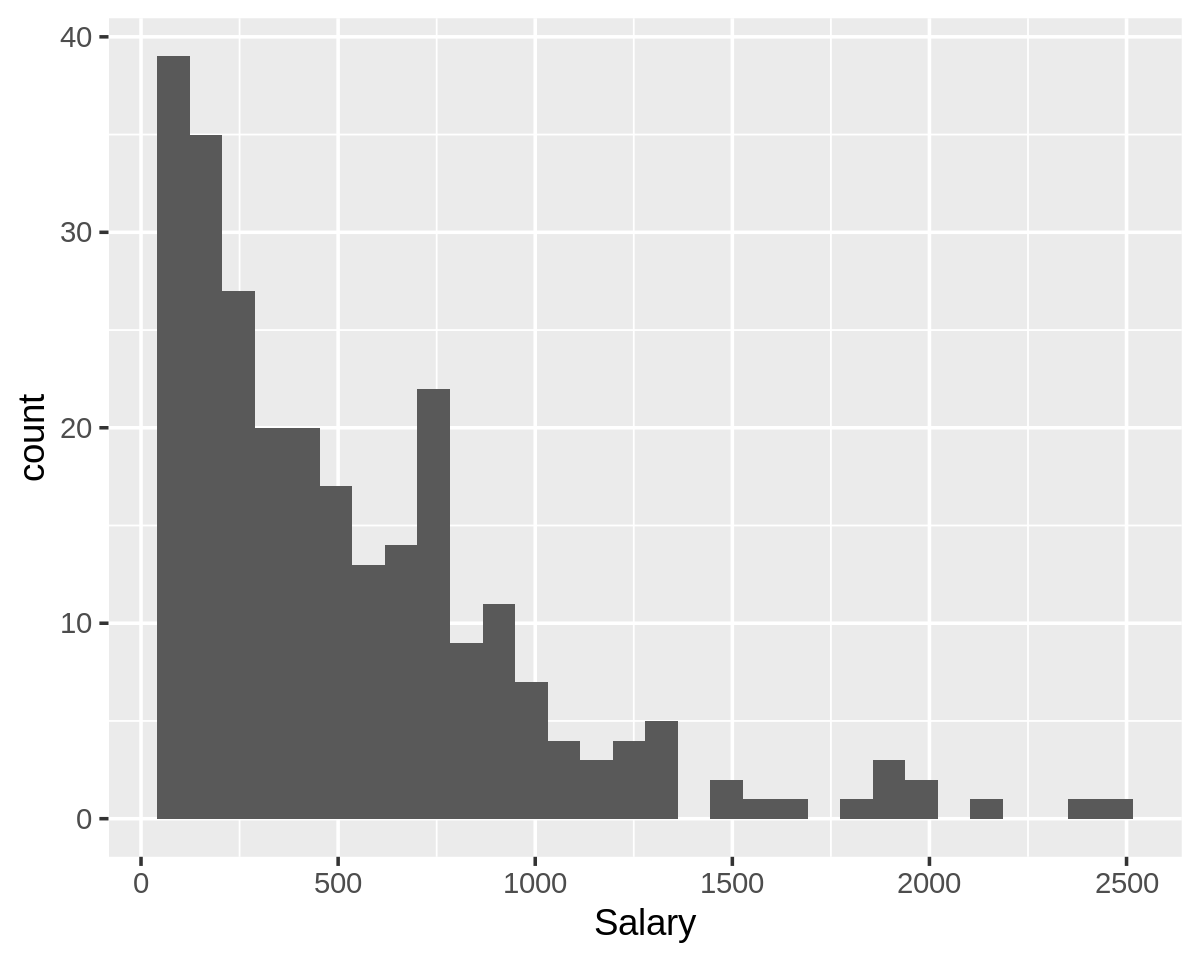

In [12]:
ggplot2::ggplot(dataframe,aes(x=Salary)) +
    ggplot2::geom_histogram()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="ggplot_plus_R" id="3k8+yrH.)39)4NV])5@Y" x="-207" y="-4"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="g|=PD-J$iF25pWf.)HuX"><mutation items="2"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="d_{8yZ{O^g}?Wq:z13O["><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="#~JN)6)_wSse42|1{Z1^"><field name="CODE">aes(x=Salary)</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="_nC:KL}(1R@-[r49RJIZ"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_histogram</field><data>ggplot2:geom_histogram</data></block></value></block></xml>

Notice that salary is not normally distributed (bell shaped).
This is a problem for regression methods that use sum squared error, because it probably means that the small number of high salaries will unduly influence the model (i.e. be **outliers**).

Similarly, make a histogram for `Hits`

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


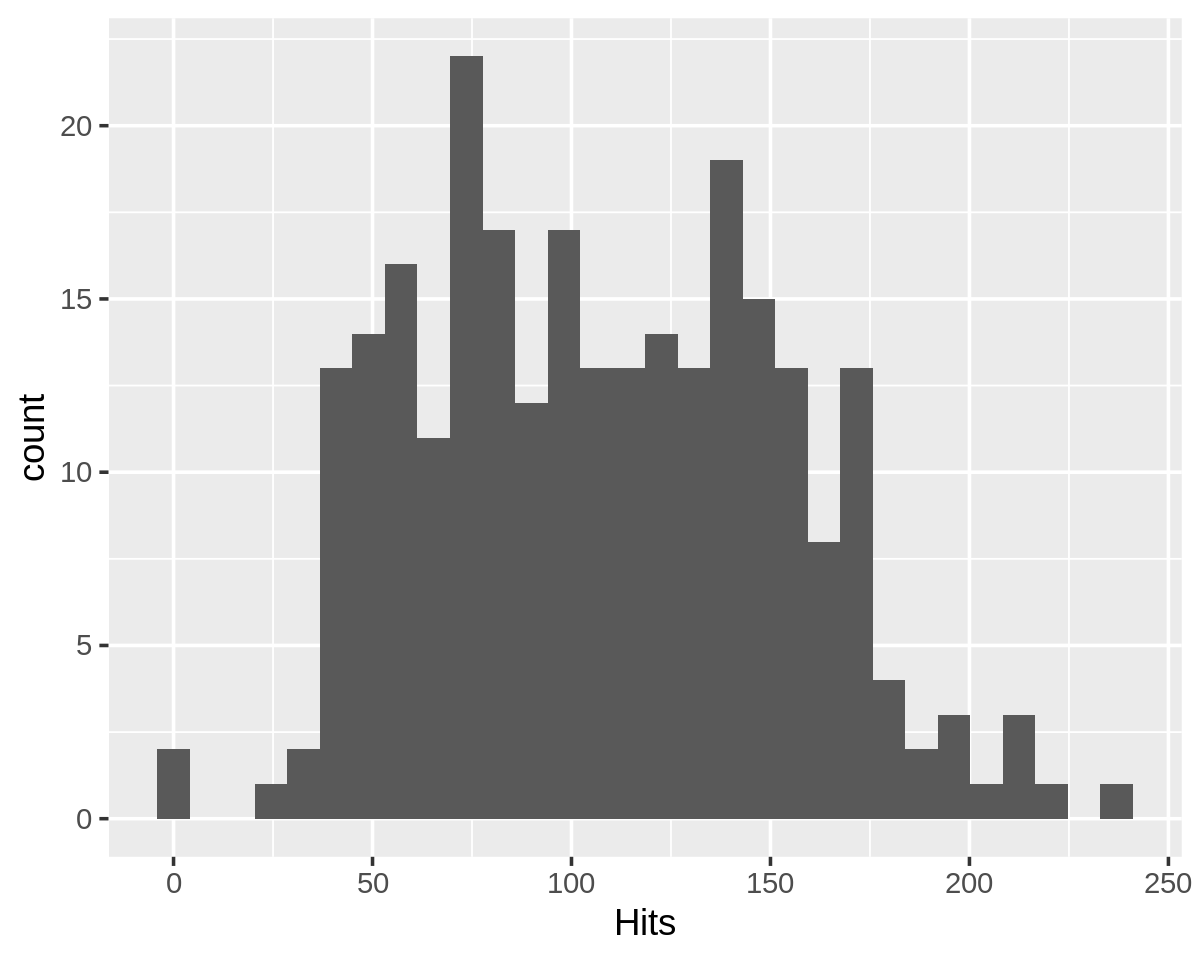

In [13]:
ggplot2::ggplot(dataframe,aes(x=Hits)) +
    ggplot2::geom_histogram()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="ggplot_plus_R" id="3k8+yrH.)39)4NV])5@Y" x="-207" y="-4"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="g|=PD-J$iF25pWf.)HuX"><mutation items="2"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="d_{8yZ{O^g}?Wq:z13O["><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="#~JN)6)_wSse42|1{Z1^"><field name="CODE">aes(x=Hits)</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="_nC:KL}(1R@-[r49RJIZ"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_histogram</field><data>ggplot2:geom_histogram</data></block></value></block></xml>

Looks reasonable. Make a histogram for `Years`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


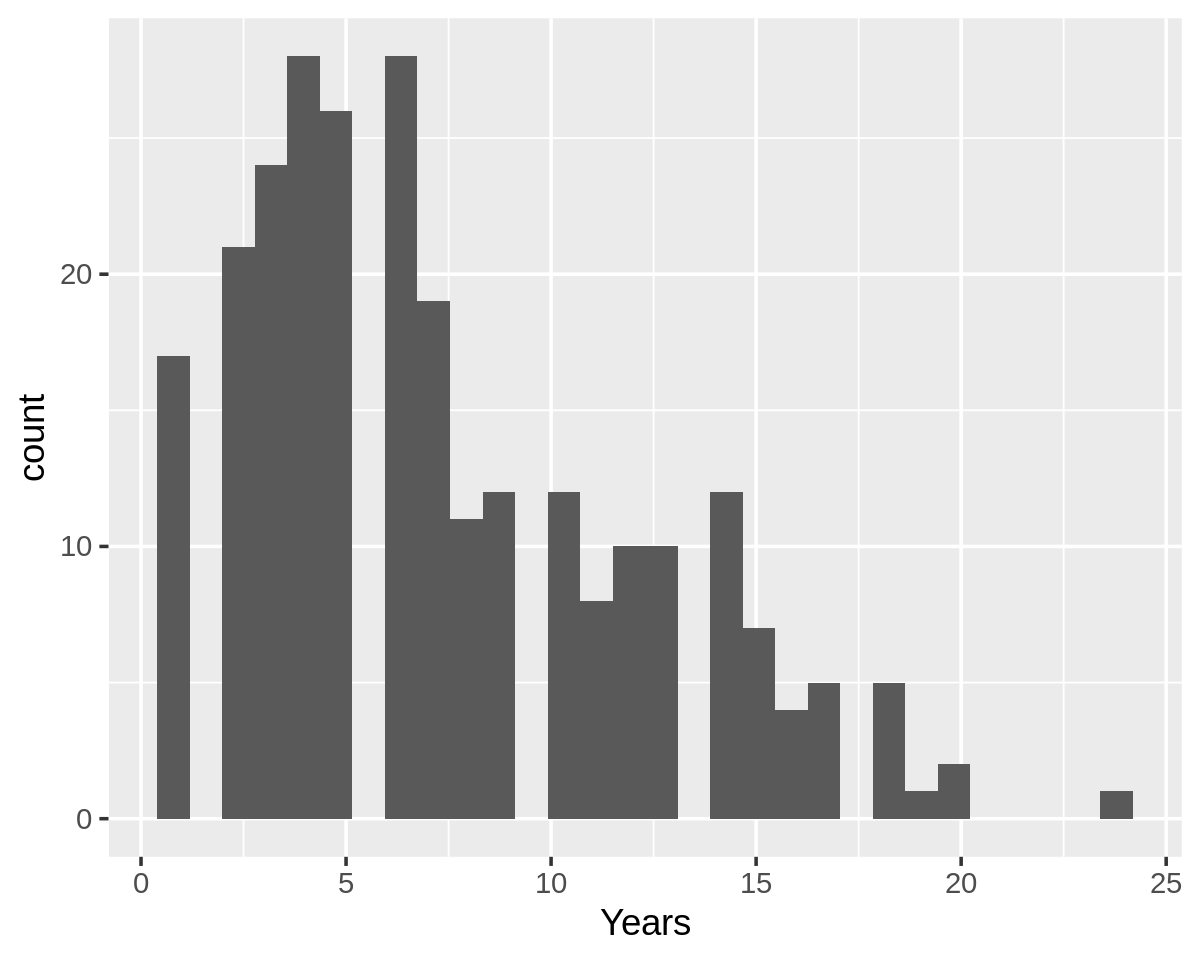

In [14]:
ggplot2::ggplot(dataframe,aes(x=Years)) +
    ggplot2::geom_histogram()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="ggplot_plus_R" id="3k8+yrH.)39)4NV])5@Y" x="-207" y="-4"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="g|=PD-J$iF25pWf.)HuX"><mutation items="2"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="d_{8yZ{O^g}?Wq:z13O["><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="#~JN)6)_wSse42|1{Z1^"><field name="CODE">aes(x=Years)</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="_nC:KL}(1R@-[r49RJIZ"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_histogram</field><data>ggplot2:geom_histogram</data></block></value></block></xml>

Also reasonable. 
Although `Years` is pretty close to bell-shaped (normal), if it were worse AND we were doing linear regression, we might consider transforming it to make it more normal.
However, we don't need to do that with a regression tree - our predictors can be as wacky as we want.
We *do* need to transform `Salary` though, for the reason given above.

There's a cool trick we can use for that as part of our workflow, just like other preprocessing steps we've done with the data.

Before we get to that though, let's take a look at what transforming does in the first place.

Make a histogram of salary where Salary has been transformed by `log`:

- `make plot`
    - with `ggplot2` do `ggplot`
        - using `dataframe`
        - and `aes(x=log(Salary))`
    - with  `ggplot2` do `geom_histogram`

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


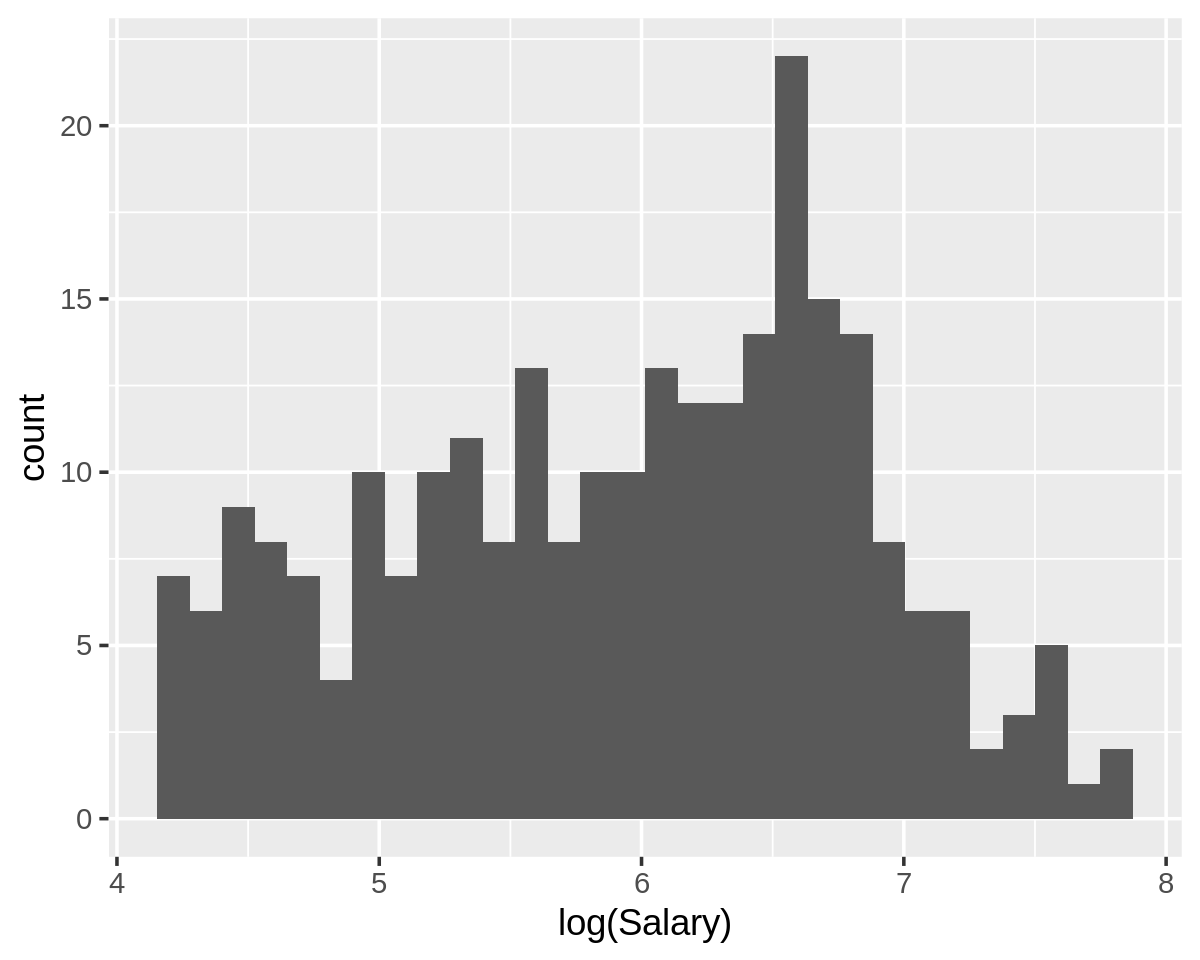

In [16]:
ggplot2::ggplot(dataframe,aes(x=log(Salary))) +
    ggplot2::geom_histogram()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="ggplot_plus_R" id="3k8+yrH.)39)4NV])5@Y" x="-207" y="-4"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="g|=PD-J$iF25pWf.)HuX"><mutation items="2"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="d_{8yZ{O^g}?Wq:z13O["><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="#~JN)6)_wSse42|1{Z1^"><field name="CODE">aes(x=log(Salary))</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="_nC:KL}(1R@-[r49RJIZ"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_histogram</field><data>ggplot2:geom_histogram</data></block></value></block></xml>

Notice that the distribution went from being tallest on the left to being tallest in the middle, albeit with some mass still on the left.
Also notice that the x-axis is no longer salary in dollars, but log dollars, as in the theory description above.

### Prepare train/test sets

We need to split the dataframe into training data and testing data.

First, load the package for splitting:

- `library rsample`

In [17]:
library(rsample)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="~~-I(f=60)#JfKGvV_AP">rsample</variable></variables><block type="import_R" id="aFBwKpYz$V@3rI9Nk71a" x="-280" y="10"><field name="libraryName" id="~~-I(f=60)#JfKGvV_AP">rsample</field></block></xml>

Warning message:
“package ‘rsample’ was built under R version 4.2.2”


Now split the data, but first specify a **random seed** so your results match mine.
           
- with `base` do `set.seed` using `2`

- Set `data_split` to `with rsample do initial split`
    - using `dataframe`
    - and `prop=.80`
- Set `data_train` to `with rsample do training`
    - using `data_split`
- Set `data_test` to `with rsample do testing`
    - using `data_split`
- `data_train`


In [18]:
base::set.seed(2)

data_split = rsample::initial_split(dataframe,prop=.80)
data_train = rsample::training(data_split)
data_test = rsample::testing(data_split)

data_train

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="bQ!4E:J!~]0(]7KV]m@=">data_split</variable><variable id=":iMr},W7(N7vSLAUw!ao">data_train</variable><variable id="~~-I(f=60)#JfKGvV_AP">rsample</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="|q$XCeTWL%AdgT|]tbnU">data_test</variable></variables><block type="varDoMethod_R" id="Bs.?L_yk:!JU:!D9$e:2" x="-107" y="198"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">set.seed</field><data>base:set.seed</data><value name="ADD0"><block type="math_number" id="y3|#H:ii-(np[L}nH,7)"><field name="NUM">2</field></block></value></block><block type="variables_set" id="s!g),aa^(]dox/f`@P!y" x="-116" y="313"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field><value name="VALUE"><block type="varDoMethod_R" id="hPsr6}9C/VNgaLsKuR,o"><mutation items="2"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">initial_split</field><data>rsample:initial_split</data><value name="ADD0"><block type="variables_get" id="]~#@ltf];dTom_%pzV4n"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="R`?vH79hsA6Duxa9)AFX"><field name="CODE">prop=.80</field></block></value></block></value><next><block type="variables_set" id="3J6#JDFV0wE?V;NuM=?L"><field name="VAR" id=":iMr},W7(N7vSLAUw!ao">data_train</field><value name="VALUE"><block type="varDoMethod_R" id="X|Q7lj,pD_9W{%^.xd7h"><mutation items="1"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">training</field><data>rsample:training</data><value name="ADD0"><block type="variables_get" id="JFCmHyJPiN`qwnlE~:iT"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field></block></value></block></value><next><block type="variables_set" id="Y]ag(g~}tkN6:_X*]6P{"><field name="VAR" id="|q$XCeTWL%AdgT|]tbnU">data_test</field><value name="VALUE"><block type="varDoMethod_R" id="WBYo8G|ZcojJAqETRnv`"><mutation items="1"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">testing</field><data>rsample:testing</data><value name="ADD0"><block type="variables_get" id="p^~x9|Zj((6qaUVvj#.E"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field></block></value></block></value></block></next></block></next></block><block type="variables_get" id="9j){6[r67+7OFx`a~K[Y" x="-115" y="515"><field name="VAR" id=":iMr},W7(N7vSLAUw!ao">data_train</field></block></xml>

AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
327,68,13,42,29,45,18,3949,939,78,438,380,466,A,E,659,53,7,400,A
573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960,A
246,76,5,35,39,13,6,912,234,12,102,96,80,A,E,44,0,1,250,A
381,110,9,61,45,32,7,3015,834,40,451,249,168,N,E,228,7,5,800,N
415,115,27,97,71,68,3,711,184,45,156,119,99,N,W,274,2,7,300,N
404,92,11,54,49,18,6,1354,325,30,188,135,63,A,E,222,5,5,300,A
614,163,29,89,83,75,11,5017,1388,266,813,822,617,N,W,303,6,6,1900,N
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A


### Fit model

Load the `recipes` and `workflows` packages, along with `parsnip`, `generics`, `hardhat`, and `broom`:

- `library recipes`
- `library workflows`
- `library parsnip`
- `library generics`
- `library hardhat`
- `library broom`

In [19]:
library(recipes)
library(workflows)
library(generics)
library(parsnip)
library(hardhat)
library(broom)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="v7B~eW}{zV,n~iX:qTJ-">recipes</variable><variable id="haMDnc8Uj|EjY^608!;]">workflows</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable><variable id="Ubl?FFCN5uCFfCTQ?7:z">broom</variable></variables><block type="import_R" id="EGE;dT.cnN,o}Y[99#Qb" x="-12" y="8"><field name="libraryName" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><next><block type="import_R" id="6DrE-26ByLD$vC}QeW:}"><field name="libraryName" id="haMDnc8Uj|EjY^608!;]">workflows</field><next><block type="import_R" id="hQ4(=]9%QB3(VWqs9OK:"><field name="libraryName" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><next><block type="import_R" id="d1vIIBH:{ygkVLV/Ts5l"><field name="libraryName" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><next><block type="import_R" id="vFfUgs[O$$~/VO1yVa~v"><field name="libraryName" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field><next><block type="import_R" id="cegz.xTQ~Bq[q~wqZQHD"><field name="libraryName" id="Ubl?FFCN5uCFfCTQ?7:z">broom</field></block></next></block></next></block></next></block></next></block></next></block></xml>

Warning message:
“package ‘recipes’ was built under R version 4.2.2”

Attaching package: ‘recipes’


The following object is masked from ‘package:stats’:

    step


Warning message:
“package ‘workflows’ was built under R version 4.2.2”

Attaching package: ‘generics’


The following object is masked from ‘package:dplyr’:

    explain


The following objects are masked from ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union


Warning message:
“package ‘parsnip’ was built under R version 4.2.2”


Let's make a workflow to predict `Salary` using `Years` and `Hits` with a regression tree and a step that log transforms `Salary`.
Remember formula syntax for specifying predictors is `+`.


- Set `recipe` to 
    - `pipe` with `recipes` do `recipe`
        - using `Salary ~ Hits + Years`
        - and `data = data_train`
    - to with `recipes` do `step_log`
        - using `Salary, skip = TRUE`
- Set `model` to 
    - `pipe` with `parsnip` do `decision_tree` 
    - to with `parsnip` do `set_mode` 
        - using `"regression"`
    - then to with `parsnip` do `set_engine`
        - using `"rpart"`
- Set `workflow` to 
    - `pipe` with `workflows` do `workflow`
    - to with `workflows` do `add_model`
        - using `model`
    - then to with `workflows` do `add_recipe` 
        - using `recipe`
        
*Note: `skip = TRUE` is essential if we are preprocessing the variable we are trying to predict. When predictions are made, it will cause the workflow to skip preprocessing this variable (which does not exist during prediction).*

In [30]:
recipe = recipes::recipe(Salary ~ Hits + Years,data = data_train) %>%
    recipes::step_log(Salary, skip = TRUE)
model = parsnip::decision_tree() %>%
    parsnip::set_mode("regression") %>%
    parsnip::set_engine("rpart")
workflow = workflows::workflow() %>%
    workflows::add_model(model) %>%
    workflows::add_recipe(recipe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Oz8-33unXZJ?3~@*32r-">recipe</variable><variable id="mgo;O)iX^5)A5.@gqIkA">model</variable><variable id="v7B~eW}{zV,n~iX:qTJ-">recipes</variable><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="haMDnc8Uj|EjY^608!;]">workflows</variable></variables><block type="variables_set" id="w{}j6,P|-6Qepjtz/mj{" x="67" y="169"><field name="VAR" id="Oz8-33unXZJ?3~@*32r-">recipe</field><value name="VALUE"><block type="pipe_R" id="uzp8+LCnH{r`1Xn%3mdK"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="U^,K1TWD+}odaY!kExkh"><mutation items="2"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">recipe</field><data>recipes:recipe</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="n(du-Q]_KTwoCFj6n|V5"><field name="CODE">Salary ~ Hits + Years</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="lIU{_ql0epb7NH-C6Kvw"><field name="CODE">data = data_train</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="5=08G^e872=?+){KI?5}"><mutation items="1"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">step_log</field><data>recipes:step_log</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="N3F}s%-T-c}.vd@vs9R{"><field name="CODE">Salary, skip = TRUE</field></block></value></block></value></block></value><next><block type="variables_set" id="*(u89h_-M@(PB-!qP/1l"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field><value name="VALUE"><block type="pipe_R" id="Oj1:/l+xksT^dSM;w{,g"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="m!?PwvZD%AJHhH1paJ[8"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">decision_tree</field><data>parsnip:decision_tree</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="ady`8N}J*2BV_*AmtF`n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_mode</field><data>parsnip:set_mode</data><value name="ADD0"><block type="text" id="#4#x{=R9!%aA:_,cHnF("><field name="TEXT">regression</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="bybPF(gahfhB3cmyy;/n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_engine</field><data>parsnip:set_engine</data><value name="ADD0"><block type="text" id="v9=Ry*6UUQjzFr5Sy@,f"><field name="TEXT">rpart</field></block></value></block></value></block></value><next><block type="variables_set" id="f%c#[D)Zv:uHH6WY_TQI"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field><value name="VALUE"><block type="pipe_R" id="Rk~*~r(!3iF+cvcz7IiD"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="H!7?PcsriTx,;-jJmb`7"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">workflow</field><data>workflows:workflow</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="CrWn^(|[{],FV=/-Jt!b"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">add_model</field><data>workflows:add_model</data><value name="ADD0"><block type="variables_get" id="7MGIpZZh#XkK`d+ZY4h:"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="L1.O)ZR~Ab`VSER(L}FZ"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">add_recipe</field><data>workflows:add_recipe</data><value name="ADD0"><block type="variables_get" id="U.@@S3Rdx{:xKxE[Fsx]"><field name="VAR" id="Oz8-33unXZJ?3~@*32r-">recipe</field></block></value></block></value></block></value></block></next></block></next></block></xml>

Fit the workflow:

-  Set `trained_model` to with `generics` do `fit`
    - using `workflow`
    - and `data = data_train`
`trained_model`

In [31]:
trained_model = generics::fit(workflow,data = data_train)

trained_model

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="l#fwZ4WDUe#-#XAb#q^;">trained_model</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable></variables><block type="variables_set" id="6F5Ls%m;fDN%1P.HL;~b" x="71" y="186"><field name="VAR" id="l#fwZ4WDUe#-#XAb#q^;">trained_model</field><value name="VALUE"><block type="varDoMethod_R" id="jAjgrG@)Vv]=~@dnuh7H"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">fit</field><data>generics:fit</data><value name="ADD0"><block type="variables_get" id="KB;+aD=xFzgUg0(`:xP:"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="siA`Xs!U2c1Ww}6ggh90"><field name="CODE">data = data_train</field></block></value></block></value></block><block type="variables_get" id="qJ0nFc9Y6f9.~_a8X@r6" x="76" y="309"><field name="VAR" id="l#fwZ4WDUe#-#XAb#q^;">trained_model</field></block></xml>

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: decision_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_log()

── Model ───────────────────────────────────────────────────────────────────────
n= 210 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 210 157.705300 5.929197  
   2) Years< 4.5 71  32.040590 5.143877  
     4) Hits< 112.5 43  16.005520 4.891826  
       8) Years< 3.5 30  11.320010 4.718206 *
       9) Years>=3.5 13   1.694297 5.292488 *
     5) Hits>=112.5 28   9.108099 5.530954  
      10) Years< 3.5 16   1.765213 5.305343 *
      11) Years>=3.5 12   5.442597 5.831770 *
   3) Years>=4.5 139  59.510660 6.330332  
     6) Hits< 117.5 76  23.414250 5.958204  
      12) Years< 6.5 23   6.777715 5.640896 *
      13) Years>=6.5 53  13.315840 6.095904 *
     7) Hits>=117.5 63  12.875920 6.779247 *

Now use `augment` to get predictions on **both the train and the test data:**

- Set `data_evaluation_train` to with `generics` do `augment`
    - `trained_model`
    - `data_train`
- Set `data_evaluation_test` to with `generics` do `augment`
    - `trained_model`
    - `data_test`
- `data_evaluation_train`

In [34]:
data_evaluation_train = generics::augment(trained_model,data_train)
data_evaluation_test = generics::augment(trained_model,data_test)

data_evaluation_train

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=".m){vq-DP6)02?|:]ctY">data_evaluation_train</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="}d*Py7G(=6BcbJEV%(Yx">data_evaluation_test</variable><variable id="l#fwZ4WDUe#-#XAb#q^;">trained_model</variable><variable id=":iMr},W7(N7vSLAUw!ao">data_train</variable><variable id="|q$XCeTWL%AdgT|]tbnU">data_test</variable></variables><block type="variables_set" id="7OSm@|dWOrh4sI}i|5zU" x="-188" y="87"><field name="VAR" id=".m){vq-DP6)02?|:]ctY">data_evaluation_train</field><value name="VALUE"><block type="varDoMethod_R" id="/V-=f8y|WOLHmMCx.011"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">augment</field><data>generics:augment</data><value name="ADD0"><block type="variables_get" id="(-yLq*8u.=fnYZQx|}dp"><field name="VAR" id="l#fwZ4WDUe#-#XAb#q^;">trained_model</field></block></value><value name="ADD1"><block type="variables_get" id="k4SaVdD8uR0WT{@2b.xL"><field name="VAR" id=":iMr},W7(N7vSLAUw!ao">data_train</field></block></value></block></value><next><block type="variables_set" id="c9)bbL(P.=Zt*ANq:wTF"><field name="VAR" id="}d*Py7G(=6BcbJEV%(Yx">data_evaluation_test</field><value name="VALUE"><block type="varDoMethod_R" id="@!!94T,fy7p./bN/HI:m"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">augment</field><data>generics:augment</data><value name="ADD0"><block type="variables_get" id="b-|JBRwH@EMvsFWEJ!;A"><field name="VAR" id="l#fwZ4WDUe#-#XAb#q^;">trained_model</field></block></value><value name="ADD1"><block type="variables_get" id="DT;7fC1oy;O,X]8)3FM1"><field name="VAR" id="|q$XCeTWL%AdgT|]tbnU">data_test</field></block></value></block></value></block></next></block><block type="variables_get" id="OI3EYMFqtCofk(0Ma~i+" x="-177" y="283"><field name="VAR" id=".m){vq-DP6)02?|:]ctY">data_evaluation_train</field></block></xml>

AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,.pred
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
327,68,13,42,29,45,18,3949,939,78,438,380,466,A,E,659,53,7,400,A,6.095904
573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960,A,6.779247
246,76,5,35,39,13,6,912,234,12,102,96,80,A,E,44,0,1,250,A,5.640896
381,110,9,61,45,32,7,3015,834,40,451,249,168,N,E,228,7,5,800,N,6.095904
415,115,27,97,71,68,3,711,184,45,156,119,99,N,W,274,2,7,300,N,5.305343
404,92,11,54,49,18,6,1354,325,30,188,135,63,A,E,222,5,5,300,A,5.640896
614,163,29,89,83,75,11,5017,1388,266,813,822,617,N,W,303,6,6,1900,N,6.779247
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A,6.779247


### Evaluate the model

First load `yardstick` to get performance metrics:

- `library yardstick`

In [33]:
library(yardstick)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable></variables><block type="import_R" id="~]m5/PaJhO^)r2YX)!Ko" x="-152" y="-34"><field name="libraryName" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field></block></xml>

For binary classification, the first factor level is assumed to be the event.
Use the argument `event_level = "second"` to alter this as needed.


Attaching package: ‘yardstick’


The following object is masked from ‘package:generics’:

    accuracy


The following object is masked from ‘package:readr’:

    spec




In [37]:
yardstick::metrics(data_evaluation_train,truth=Salary,estimate=.pred)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable><variable id=".m){vq-DP6)02?|:]ctY">data_evaluation_train</variable></variables><block type="varDoMethod_R" id="inWd.y}usn;$W=6*MYue" x="84" y="89"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">metrics</field><data>yardstick:metrics</data><value name="ADD0"><block type="variables_get" id="#Nn-A~]R1A*g|umtmd!0"><field name="VAR" id=".m){vq-DP6)02?|:]ctY">data_evaluation_train</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="xr=;RC$yfK55r(BoVEyE"><field name="CODE">truth=Salary</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="$6;pjh=+DHk@ActRT2Q#"><field name="CODE">estimate=.pred</field></block></value></block></xml>

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,697.5199524
rsq,standard,0.4210105
mae,standard,527.0075364


Get the $r^2$ on the *training* set:

- with `yardstick` do `metrics`
    - using `data_evaluation_train`
    - and `truth=Salary`
    - and `estimate=.pred`
    

Copy and modify the blocks to get the $r^2$ on the *testing* set below.

In [39]:
yardstick::metrics(data_evaluation_test,truth=Salary,estimate=.pred)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable><variable id="}d*Py7G(=6BcbJEV%(Yx">data_evaluation_test</variable></variables><block type="varDoMethod_R" id="inWd.y}usn;$W=6*MYue" x="84" y="89"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">metrics</field><data>yardstick:metrics</data><value name="ADD0"><block type="variables_get" id="#Nn-A~]R1A*g|umtmd!0"><field name="VAR" id="}d*Py7G(=6BcbJEV%(Yx">data_evaluation_test</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="xr=;RC$yfK55r(BoVEyE"><field name="CODE">truth=Salary</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="$6;pjh=+DHk@ActRT2Q#"><field name="CODE">estimate=.pred</field></block></value></block></xml>

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,685.5718378
rsq,standard,0.4571759
mae,standard,541.8383877


We can see that our training and testing performance is very comparable, which is good.

This means we do not have a problem of **overfitting** which is when we have overfit the training data and can no longer generalize well to new data.

### Visualize the model

Load `rpart.plot` and set plot options so we can visualize the tree:

- `library(rpart.plot)` (this must be a freestyle)
- with `base` do `options`
    - using `repr.plot.height = 7`
- with `base` do `options`
    - using `repr.plot.width = 7`

In [40]:
library(rpart.plot)

base::options(repr.plot.height = 7)

base::options(repr.plot.width = 7)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="6C!l+@S8,SvtzakmsxQD">base</variable></variables><block type="dummyNoOutputCodeBlock_R" id="^;!%/[z.7tLAcWeV[e{#" x="-161" y="-69"><field name="CODE">library(rpart.plot)</field></block><block type="varDoMethod_R" id="M/hD0RBcNgb@40BJ@Ry0" x="-169" y="47"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">options</field><data>base:options</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="4Z:O$07IIfjkp}m7WU5Q"><field name="CODE">repr.plot.height = 7</field></block></value></block><block type="varDoMethod_R" id="eJGq*-prZ8N=XnjVZcjd" x="-170" y="125"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">options</field><data>base:options</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="FX4MxoW846AmGf}|rSD:"><field name="CODE">repr.plot.width = 7</field></block></value></block></xml>

Loading required package: rpart


Attaching package: ‘rpart’


The following object is masked from ‘package:generics’:

    prune




Now create the plot:

- `pipe`
    - `model`
    - to with `parsnip` do `extract_fit_engine`
    - then to `rpart.plot()`

Warning message:
“Cannot retrieve the data used to build the model (so cannot determine roundint and is.binary for the variables).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE.”


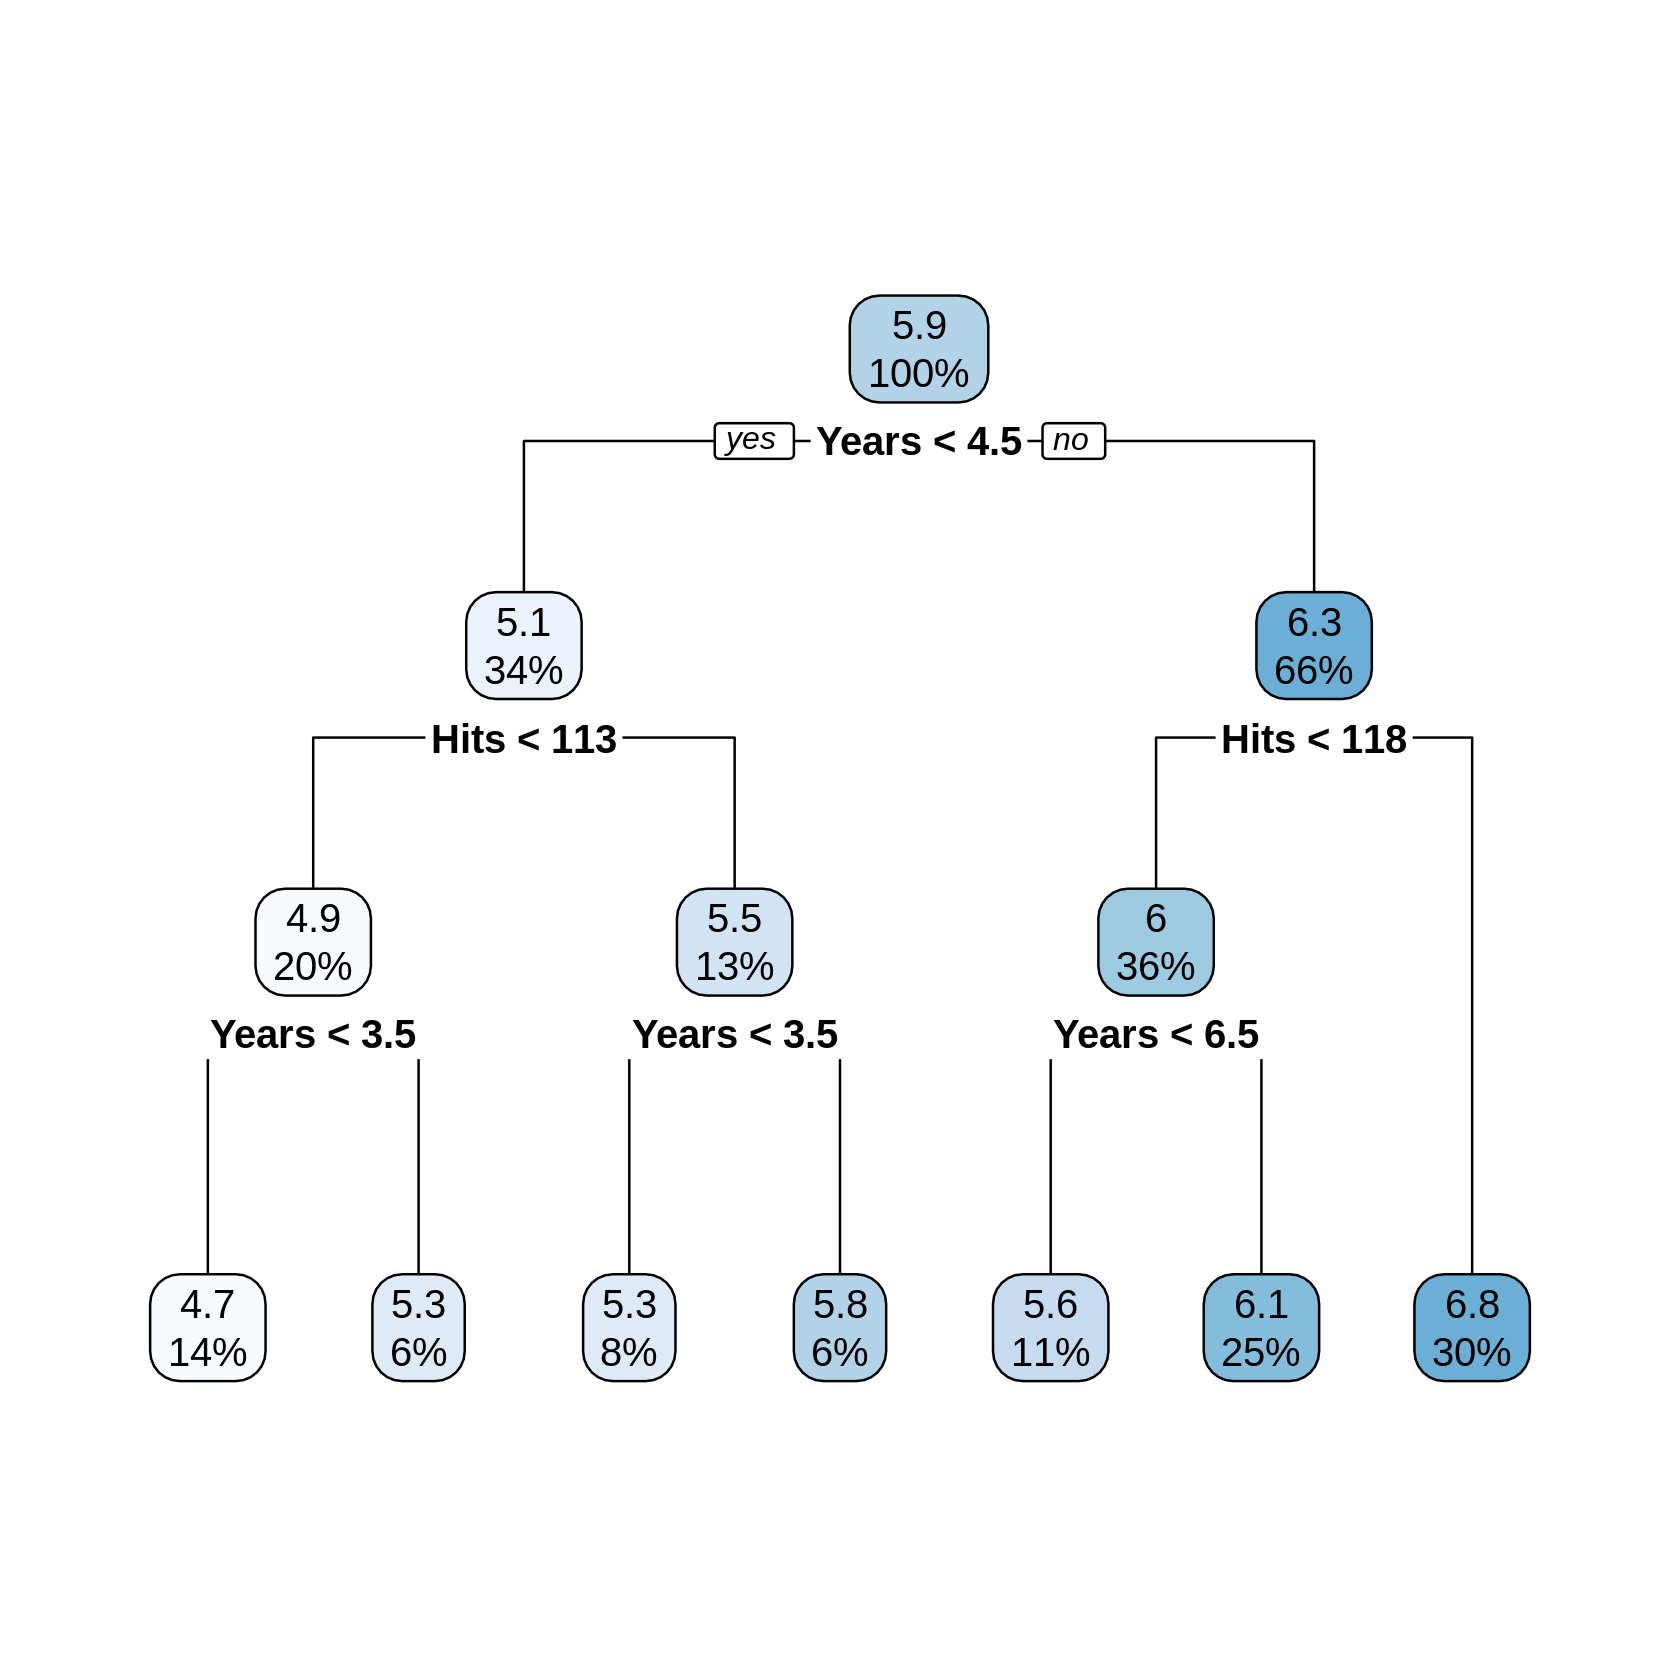

In [41]:
trained_model %>%
    hardhat::extract_fit_engine() %>%
    rpart.plot()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="l#fwZ4WDUe#-#XAb#q^;">trained_model</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable></variables><block type="pipe_R" id="67=ZV[vdO,.FoE!d07?w" x="-123" y="8"><mutation items="2"></mutation><value name="INPUT"><block type="variables_get" id="_gn,tq7t7wiA/1q0%B--"><field name="VAR" id="l#fwZ4WDUe#-#XAb#q^;">trained_model</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="u!)8wOz=1YJ47h8mH52D"><mutation items="1"></mutation><field name="VAR" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field><field name="MEMBER">extract_fit_engine</field><data>hardhat:extract_fit_engine</data></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="OH;{NKpO#b?!)7Gn6wd?"><field name="CODE">rpart.plot()</field></block></value></block></xml>

The first property in each node is the value of our target variable, `Salary`, **but** it is the log transformed version.
For example, `exp(5.9)` is about 365, so the top of the tree starts at \$365,000/year.
Starting at the top, players with fewer years make less on average, unless they have a lot of hits.
Players with more years make more on average, and again even more if they have more hits.
Overall, the model supports the intuition  that both seniority and performance are factors that determine salary.

If the tree were overfit, we could introduce a penalty parameter into the tree model.
A common penalty parameter penalizes the tree based on how many misclassifications it has and how many leaves it has.
Many penalization schemes have this kind of approach - they try to get "bang for the buck" - or most performance from the smallest/simplest model.
Just like we discussed with lasso and ridge regression, the specific value of the penalization is a hyperparameter you'd need to find for your data, which we'll talk about later on.

<!--  -->